In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from regressors import stats

In [3]:
data = pd.read_csv(r"E:\assignements\ML Course\assignment\M5_Projectupdated_ML\M5 Project solution\Raw_Housing_Prices.csv", parse_dates=['Date House was Sold'])
print(data.head(10))

           ID Date House was Sold  Sale Price  No of Bedrooms  \
0  7129300520          2017-10-14    221900.0               3   
1  6414100192          2017-12-14    538000.0               3   
2  5631500400          2016-02-15    180000.0               2   
3  2487200875          2017-12-14    604000.0               4   
4  1954400510          2016-02-15    510000.0               3   
5  7237550310          2017-05-14   1230000.0               4   
6  1321400060          2017-06-14    257500.0               3   
7  2008000270          2016-01-15    291850.0               3   
8  2414600126          2016-04-15    229500.0               3   
9  3793500160          2016-03-15    323000.0               3   

   No of Bathrooms  Flat Area (in Sqft)  Lot Area (in Sqft)  No of Floors  \
0             1.00               1180.0              5650.0           1.0   
1             2.25               2570.0              7242.0           2.0   
2             1.00                770.0             1

<h2>Studing the Data</h2>

In [4]:
data.dtypes

ID                                                    int64
Date House was Sold                          datetime64[ns]
Sale Price                                          float64
No of Bedrooms                                        int64
No of Bathrooms                                     float64
Flat Area (in Sqft)                                 float64
Lot Area (in Sqft)                                  float64
No of Floors                                        float64
Waterfront View                                      object
No of Times Visited                                  object
Condition of the House                               object
Overall Grade                                         int64
Area of the House from Basement (in Sqft)           float64
Basement Area (in Sqft)                               int64
Age of House (in Years)                               int64
Renovated Year                                        int64
Zipcode                                 

In [5]:
round(data.isnull().sum()).to_frame().rename(columns = {0: 'Nulls'})

,Nulls
ID,0
Date House was Sold,0
Sale Price,4
No of Bedrooms,0
No of Bathrooms,4
Flat Area (in Sqft),9
Lot Area (in Sqft),9
No of Floors,0
Waterfront View,0
No of Times Visited,0


In [6]:
data.describe()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
count,2.161300e+04,2.160900e+04,21613.000000,21609.000000,21604.000000,2.160400e+04,21613.000000,21613.000000,21610.000000,21613.000000,21613.000000,21613.000000,21612.000000,21612.000000,21612.000000,21612.000000,21613.000000
mean,4.580302e+09,5.401984e+05,3.370842,2.114732,2079.931772,1.510776e+04,1.494309,7.623467,1788.344193,291.509045,46.994864,84.402258,98077.937766,47.560048,-122.213892,1986.538914,12768.455652
std,2.876566e+09,3.673890e+05,0.930062,0.770138,918.487597,4.142827e+04,0.539989,1.105439,827.982604,442.575043,29.373411,401.679240,53.505425,0.138565,0.140830,685.404255,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,3.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,21.000000,0.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617500e+03,1.500000,7.000000,1560.000000,0.000000,43.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,8.000000,2210.000000,560.000000,67.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,10.000000,9410.000000,4820.000000,118.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
data.columns = data.columns.str.replace(' ','_')

In [8]:
data

,ID,Date_House_was_Sold,Sale_Price,No_of_Bedrooms,No_of_Bathrooms,Flat_Area_(in_Sqft),Lot_Area_(in_Sqft),No_of_Floors,Waterfront_View,No_of_Times_Visited,...,Overall_Grade,Area_of_the_House_from_Basement_(in_Sqft),Basement_Area_(in_Sqft),Age_of_House_(in_Years),Renovated_Year,Zipcode,Latitude,Longitude,Living_Area_after_Renovation_(in_Sqft),Lot_Area_after_Renovation_(in_Sqft)
0,7129300520,2017-10-14,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,2017-12-14,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,2016-02-15,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,2017-12-14,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,2016-02-15,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2017-05-14,360000.0,3,2.50,1530.0,1131.0,3.0,No,None,...,8,1530.0,0,9,0,98103.0,47.6993,-122.346,1530.0,1509
21609,6600060120,2016-02-15,400000.0,4,2.50,2310.0,5813.0,2.0,No,None,...,8,2310.0,0,4,0,98146.0,47.5107,-122.362,1830.0,7200
21610,1523300141,2017-06-14,402101.0,2,0.75,1020.0,1350.0,2.0,No,None,...,7,1020.0,0,9,0,98144.0,47.5944,-122.299,1020.0,2007
21611,291310100,2016-01-15,400000.0,3,2.50,1600.0,2388.0,2.0,No,None,...,8,1600.0,0,14,0,98027.0,47.5345,-122.069,1410.0,1287


Text(0.5, 1.0, 'Sale_Price')

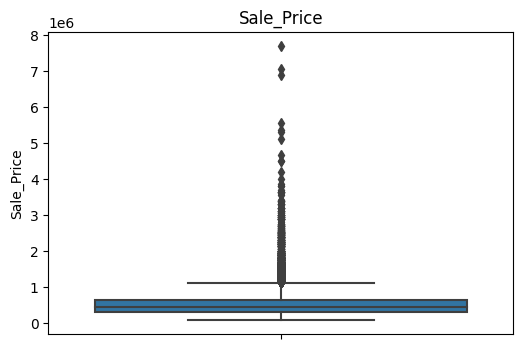

In [9]:
plt.figure(dpi = 100)

sns.boxplot(y= data['Sale_Price'])
plt.title('Sale_Price')

Text(0.5, 1.0, 'No_of_Bathrooms')

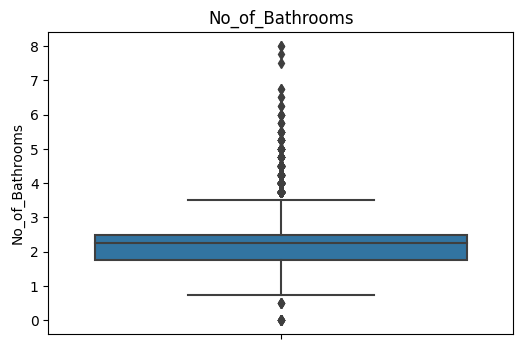

In [10]:
plt.figure(dpi = 100)

sns.boxplot(y= data['No_of_Bathrooms'])
plt.title('No_of_Bathrooms')

Text(0.5, 1.0, 'Flat_Area_(in_Sqft)')

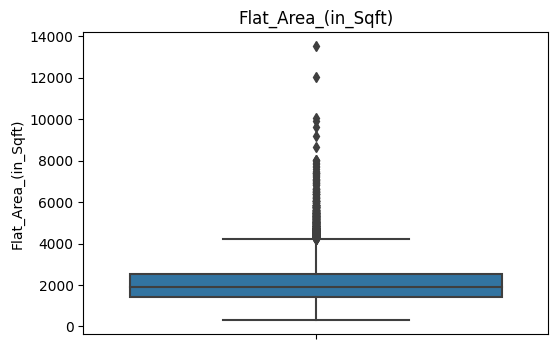

In [11]:
plt.figure(dpi = 100)

sns.boxplot(y= data['Flat_Area_(in_Sqft)'])
plt.title('Flat_Area_(in_Sqft)')

Text(0.5, 1.0, 'Lot_Area_(in_Sqft)')

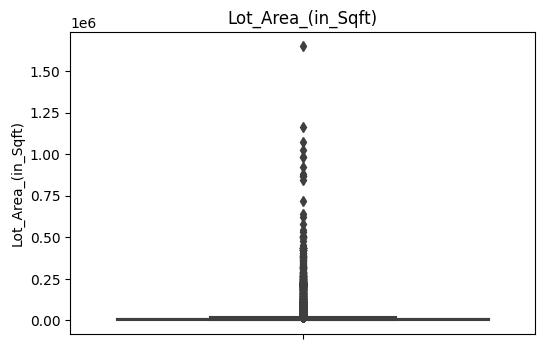

In [12]:
plt.figure(dpi = 100)

sns.boxplot(y= data['Lot_Area_(in_Sqft)'])
plt.title('Lot_Area_(in_Sqft)')

Text(0.5, 1.0, 'Area_of_the_House_from_Basement_(in_Sqft)')

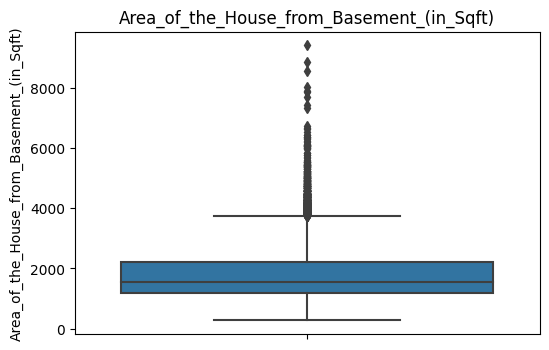

In [13]:
plt.figure(dpi = 100)

sns.boxplot(y= data['Area_of_the_House_from_Basement_(in_Sqft)'])
plt.title('Area_of_the_House_from_Basement_(in_Sqft)')



<h2>Null value Treatment</h2>

We will take care of the Null Values by imputing. We will impute with Median as we have quite a lot of Outliers in the columns.  

In [14]:
from sklearn.impute import SimpleImputer
imputer_median = SimpleImputer(missing_values=np.nan, strategy='median')
imputer_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [15]:
imputer_median.fit(data[['Flat_Area_(in_Sqft)','Lot_Area_(in_Sqft)','Area_of_the_House_from_Basement_(in_Sqft)']])

data[['Flat_Area_(in_Sqft)','Lot_Area_(in_Sqft)','Area_of_the_House_from_Basement_(in_Sqft)']] = imputer_median.transform(data[['Flat_Area_(in_Sqft)','Lot_Area_(in_Sqft)','Area_of_the_House_from_Basement_(in_Sqft)']])

In [16]:
imputer_mode.fit(data[['No_of_Bathrooms']])
data[['No_of_Bathrooms']] = imputer_mode.transform(data[['No_of_Bathrooms']])

In [17]:
data.dropna(axis = 0, how = 'any', inplace = True)

In [18]:
data.describe()

,ID,Sale_Price,No_of_Bedrooms,No_of_Bathrooms,Flat_Area_(in_Sqft),Lot_Area_(in_Sqft),No_of_Floors,Overall_Grade,Area_of_the_House_from_Basement_(in_Sqft),Basement_Area_(in_Sqft),Age_of_House_(in_Years),Renovated_Year,Zipcode,Latitude,Longitude,Living_Area_after_Renovation_(in_Sqft),Lot_Area_after_Renovation_(in_Sqft)
count,2.160500e+04,2.160500e+04,21605.000000,21605.000000,21605.000000,2.160500e+04,21605.000000,21605.000000,21605.000000,21605.000000,21605.000000,21605.000000,21605.000000,21605.000000,21605.000000,21605.000000,21605.000000
mean,4.580367e+09,5.402050e+05,3.370840,2.114742,2079.941032,1.510819e+04,1.494237,7.623513,1788.388243,291.513307,46.994214,84.340338,98077.939088,47.560033,-122.213876,1986.590558,12771.120065
std,2.876596e+09,3.674205e+05,0.929939,0.770125,918.393347,4.142714e+04,0.539927,1.105600,827.997287,442.589231,29.367378,401.536399,53.508573,0.138561,0.140831,685.475040,27308.853462
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,3.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.215000e+05,3.000000,1.750000,1430.000000,5.042000e+03,1.000000,7.000000,1190.000000,0.000000,21.000000,0.000000,98033.000000,47.470900,-122.328000,1490.000000,5100.000000
50%,3.904931e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617500e+03,1.500000,7.000000,1560.000000,0.000000,43.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,8.000000,2210.000000,560.000000,67.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10086.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,10.000000,9410.000000,4820.000000,118.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


<h2>Treating Outliers</h2>

In [19]:
data.Sale_Price.quantile(0.25), data.Sale_Price.quantile(0.75)

(321500.0, 645000.0)

In [20]:
IQR = data.Sale_Price.quantile(0.75)-data.Sale_Price.quantile(0.25)
Upper_limit = data.Sale_Price.quantile(0.75) + 1.5*IQR
Upper_limit

1130250.0

In [21]:
len(data['Sale_Price'][data['Sale_Price'] > Upper_limit])/len(data['Sale_Price'])

# 5% of the data are beyond the upper limit

0.05271927794492016

In [22]:
data['Sale_Price'] = data['Sale_Price'].where(data['Sale_Price']<Upper_limit, other = Upper_limit)

In [23]:
data['Sale_Price'].describe()

count    2.160500e+04
mean     5.116558e+05
std      2.501709e+05
min      7.500000e+04
25%      3.215000e+05
50%      4.500000e+05
75%      6.450000e+05
max      1.130250e+06
Name: Sale_Price, dtype: float64

Text(0.5, 1.0, 'Sale_Price')

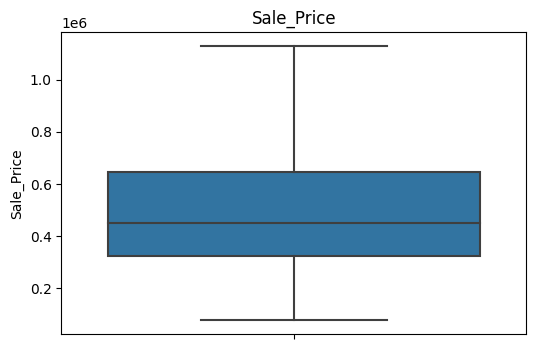

In [24]:
plt.figure(dpi = 100)

sns.boxplot(y= data['Sale_Price'])
plt.title('Sale_Price')

# We have succesfully removed the Outliers

<h2>Variable Transformation</h2>

In [25]:
data['year_sold'] = pd.DatetimeIndex(data['Date_House_was_Sold']).year

In [26]:
data['ever_renovated'] = np.where(data['Renovated_Year'] == 0, 'No', 'Yes')

In [27]:
data['Years_past_renovation'] = np.where(data['ever_renovated'] == 'Yes', abs(data['year_sold']-data['Renovated_Year']), 0)

In [28]:
redundant_cols = ['Date_House_was_Sold', 'ID', 'Renovated_Year', 'year_sold']
data.drop(columns =redundant_cols, axis = 1, inplace = True)

In [29]:
data.columns, data.shape

(Index(['Sale_Price', 'No_of_Bedrooms', 'No_of_Bathrooms',
        'Flat_Area_(in_Sqft)', 'Lot_Area_(in_Sqft)', 'No_of_Floors',
        'Waterfront_View', 'No_of_Times_Visited', 'Condition_of_the_House',
        'Overall_Grade', 'Area_of_the_House_from_Basement_(in_Sqft)',
        'Basement_Area_(in_Sqft)', 'Age_of_House_(in_Years)', 'Zipcode',
        'Latitude', 'Longitude', 'Living_Area_after_Renovation_(in_Sqft)',
        'Lot_Area_after_Renovation_(in_Sqft)', 'ever_renovated',
        'Years_past_renovation'],
       dtype='object'),
 (21605, 20))

In [30]:
Numeric_columns = ['No_of_Bedrooms', 'No_of_Bathrooms','Flat_Area_(in_Sqft)', 'Lot_Area_(in_Sqft)','No_of_Floors', 'Overall_Grade', 
                   'Area_of_the_House_from_Basement_(in_Sqft)', 'Basement_Area_(in_Sqft)', 'Age_of_House_(in_Years)','Latitude', 'Longitude', 
                   'Living_Area_after_Renovation_(in_Sqft)','Lot_Area_after_Renovation_(in_Sqft)', 'Years_past_renovation'
                  ]

Categorical_columns = [x for x in data.columns if x not in Numeric_columns and x != 'Sale_Price']

In [31]:
Categorical_columns, Numeric_columns

(['Waterfront_View',
  'No_of_Times_Visited',
  'Condition_of_the_House',
  'Zipcode',
  'ever_renovated'],
 ['No_of_Bedrooms',
  'No_of_Bathrooms',
  'Flat_Area_(in_Sqft)',
  'Lot_Area_(in_Sqft)',
  'No_of_Floors',
  'Overall_Grade',
  'Area_of_the_House_from_Basement_(in_Sqft)',
  'Basement_Area_(in_Sqft)',
  'Age_of_House_(in_Years)',
  'Latitude',
  'Longitude',
  'Living_Area_after_Renovation_(in_Sqft)',
  'Lot_Area_after_Renovation_(in_Sqft)',
  'Years_past_renovation'])

<h1>Univariate Analysis</h1>

<h2>Plotting Categorical Varaibles</h2>

In [32]:
def Group_plot_cat(cols, target, data):
    sns.barplot( x= cols, y = target, data = data.groupby([cols])[target].mean().reset_index())
    plt.title(cols)
    plt.show

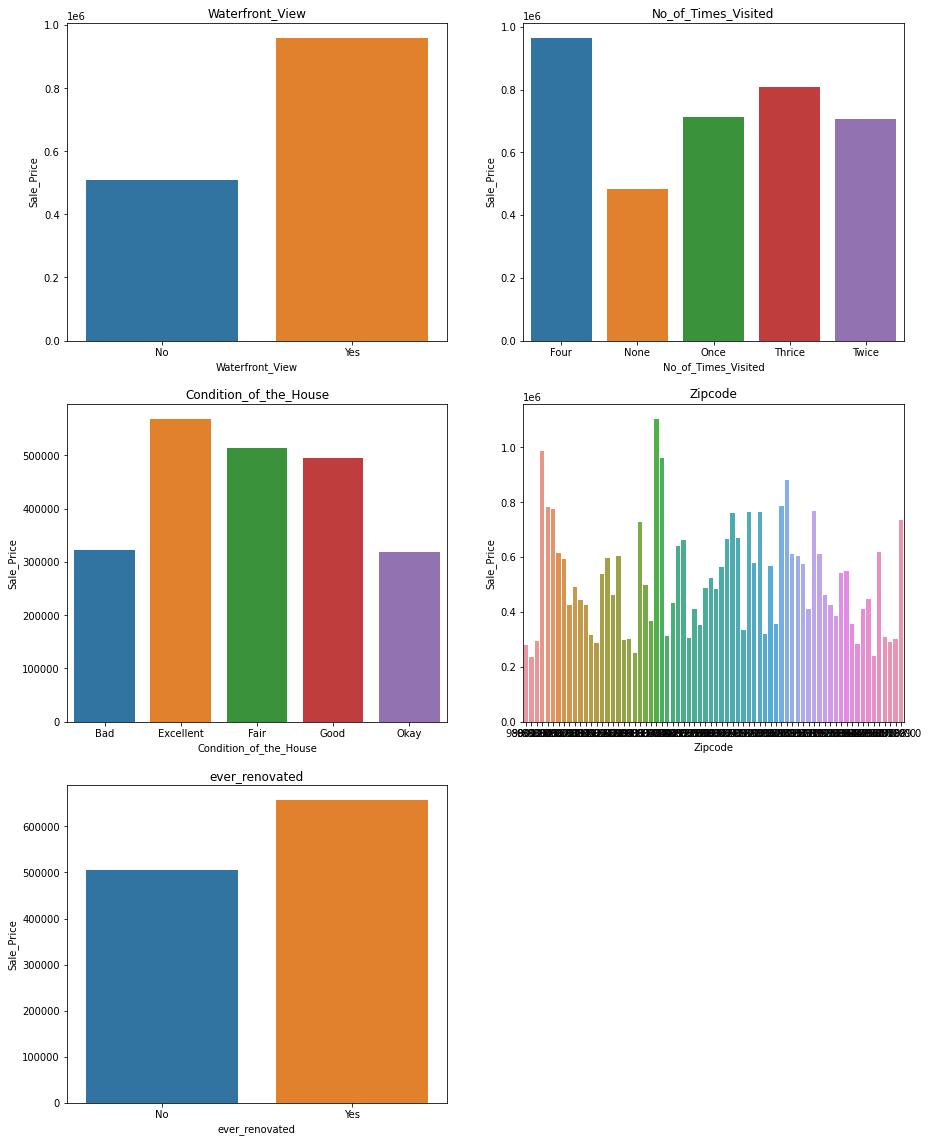

In [33]:
plt.figure(figsize=(15,8))

j=1
for col in Categorical_columns:
    plt.subplot(3,2,j)
    Group_plot_cat(col, 'Sale_Price', data)
    j= j+1

plt.subplots_adjust(top= 2)

In [34]:
dict = {'Bad': 'Bad', 'Okay': 'Bad', 'Fair': 'Good', 'Good': 'Good', 'Excellent': 'Excellent'}

data['Condition_of_the_House'] =  data.Condition_of_the_House.map(dict)

In [35]:
data.Condition_of_the_House.value_counts()

Good         19702
Excellent     1701
Bad            202
Name: Condition_of_the_House, dtype: int64

<h2>Plotting Numerical Varaibles</h2>

In [36]:
def Group_plot_num(cols, data):
    sns.distplot(a= data[[cols]])
    plt.title(cols)
    plt.show
  

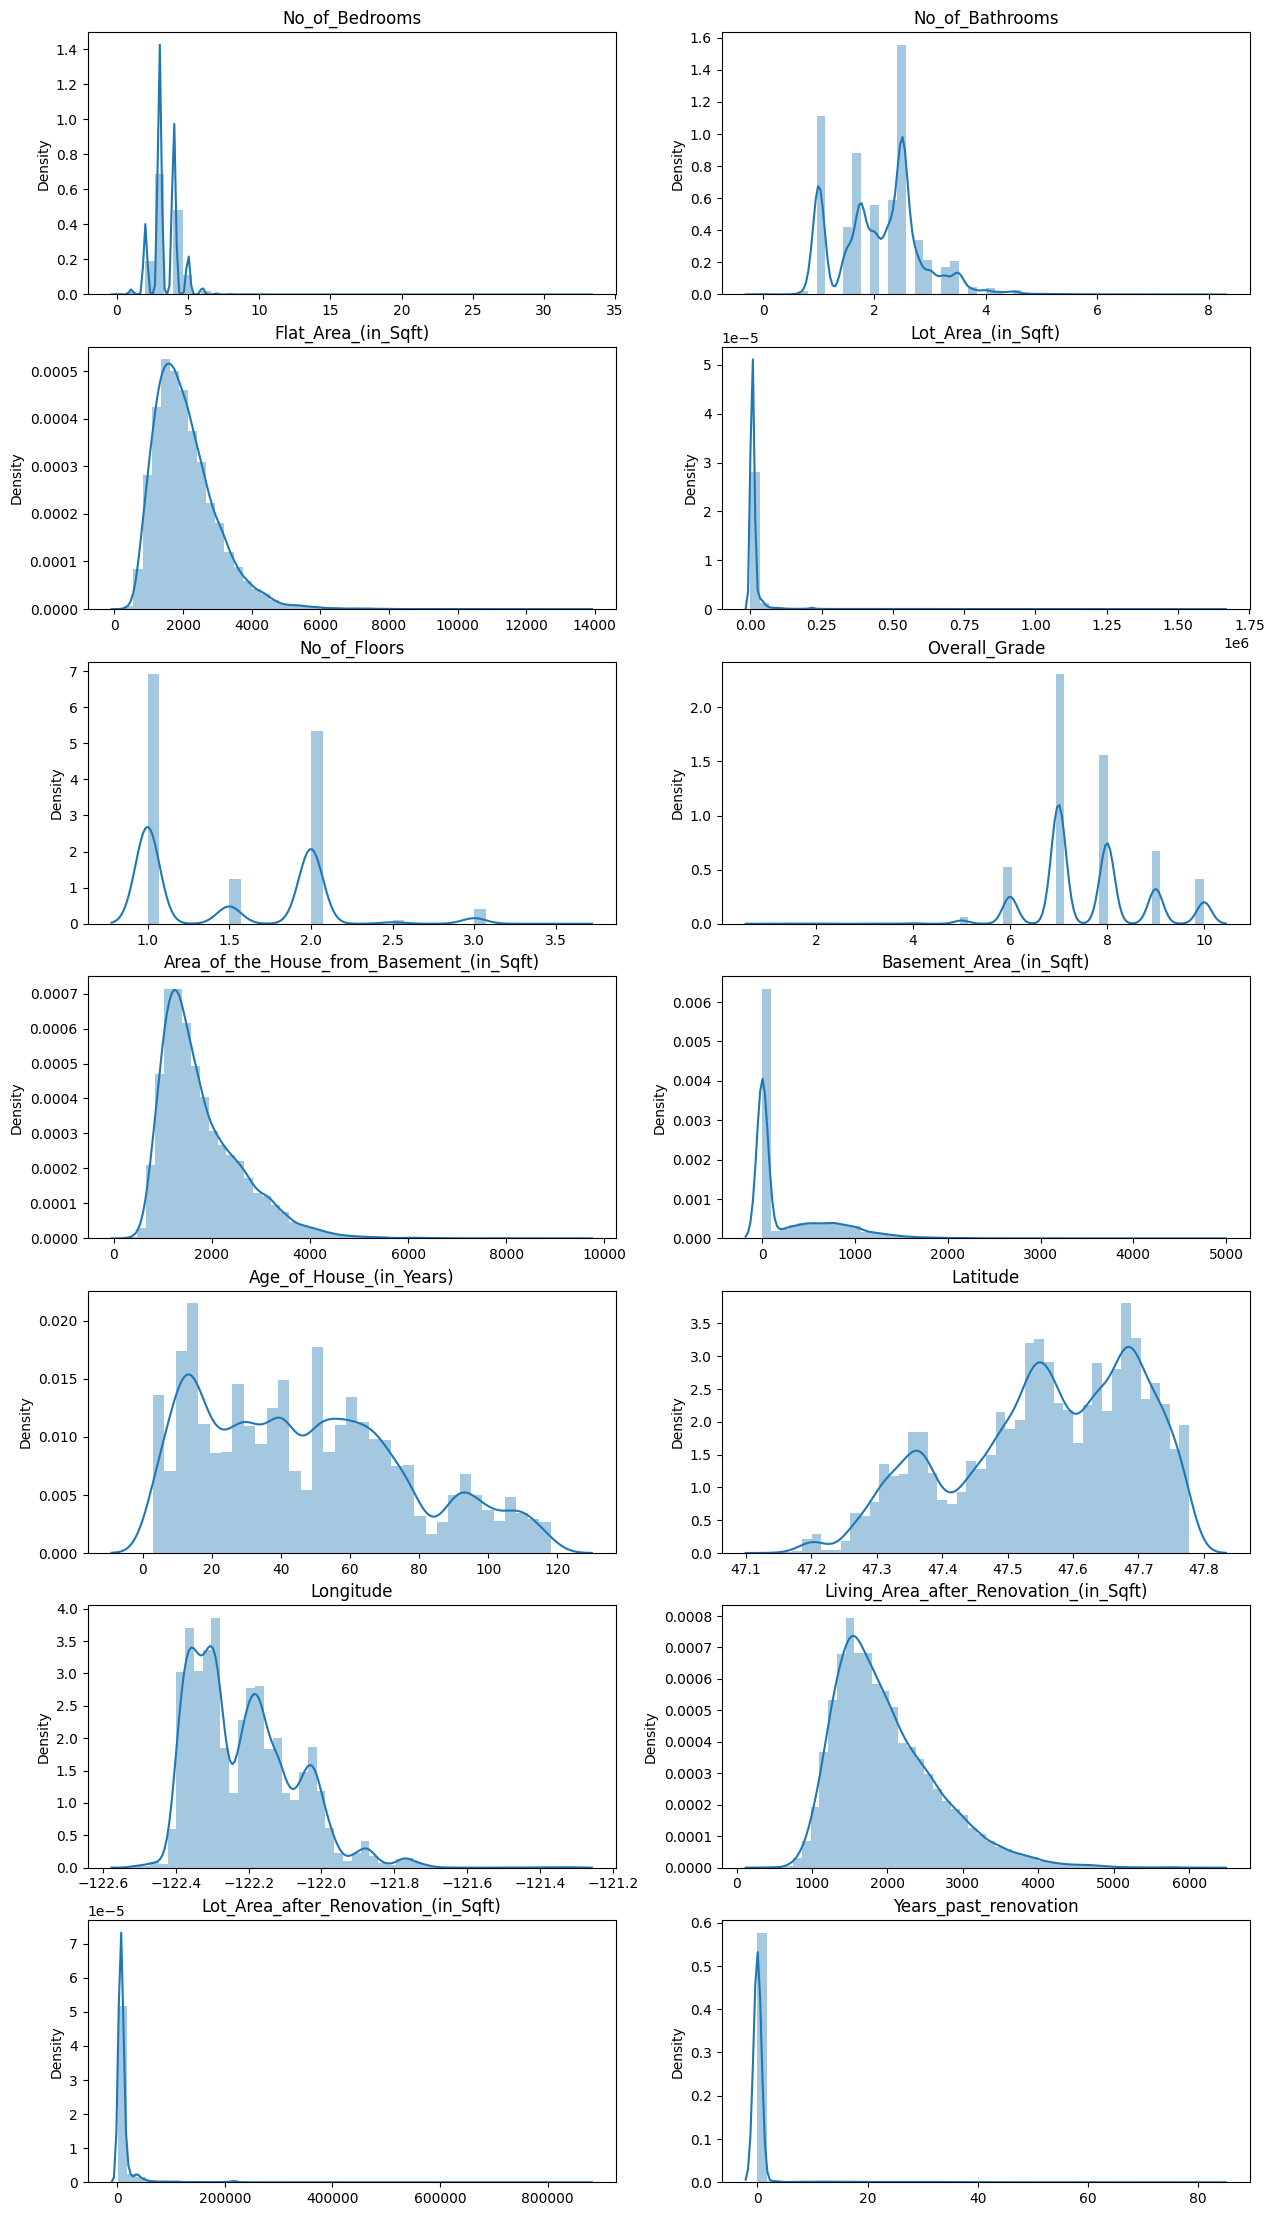

In [37]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.figure(figsize=(15,20), dpi =100)

j=1
for col in Numeric_columns:
    plt.subplot(7,2,j)
    Group_plot_num(col, data)
    j= j+1

plt.subplots_adjust(top= 1.2)

<h2>Removing the Skewness</h2>

In [38]:
Col_right_skew = [x for x in Numeric_columns if x not in ['Latitude', 'Overall_Grade', 'Age_of_House_(in_Years)']]

In [39]:
data[Col_right_skew] = np.log(abs(data[Col_right_skew]+100))

data[Col_right_skew]

,No_of_Bedrooms,No_of_Bathrooms,Flat_Area_(in_Sqft),Lot_Area_(in_Sqft),No_of_Floors,Area_of_the_House_from_Basement_(in_Sqft),Basement_Area_(in_Sqft),Longitude,Living_Area_after_Renovation_(in_Sqft),Lot_Area_after_Renovation_(in_Sqft),Years_past_renovation
0,4.634729,4.615121,7.154615,8.656955,4.615121,7.154615,4.605170,3.102657,7.272398,8.656955,4.605170
1,4.634729,4.627421,7.889834,8.901367,4.624973,7.727535,6.214608,3.105438,7.489971,8.954028,4.836282
2,4.624973,4.615121,6.768493,9.220291,4.615121,6.768493,4.605170,3.101578,7.944492,9.007245,4.605170
3,4.644391,4.634729,7.630461,8.536996,4.615121,7.047517,6.917706,3.108748,7.286192,8.536996,4.605170
4,4.634729,4.624973,7.484369,9.009447,4.615121,7.484369,4.605170,3.093086,7.549609,8.936298,4.605170
...,...,...,...,...,...,...,...,...,...,...,...
21608,4.634729,4.629863,7.396335,7.115582,4.634729,7.396335,4.605170,3.106647,7.396335,7.383368,4.605170
21609,4.644391,4.629863,7.787382,8.684909,4.624973,7.787382,4.605170,3.107363,7.565275,8.895630,4.605170
21610,4.624973,4.612642,7.021084,7.279319,4.624973,7.021084,4.605170,3.104542,7.021084,7.653020,4.605170
21611,4.634729,4.629863,7.438384,7.819234,4.624973,7.438384,4.605170,3.094174,7.319865,7.234898,4.605170


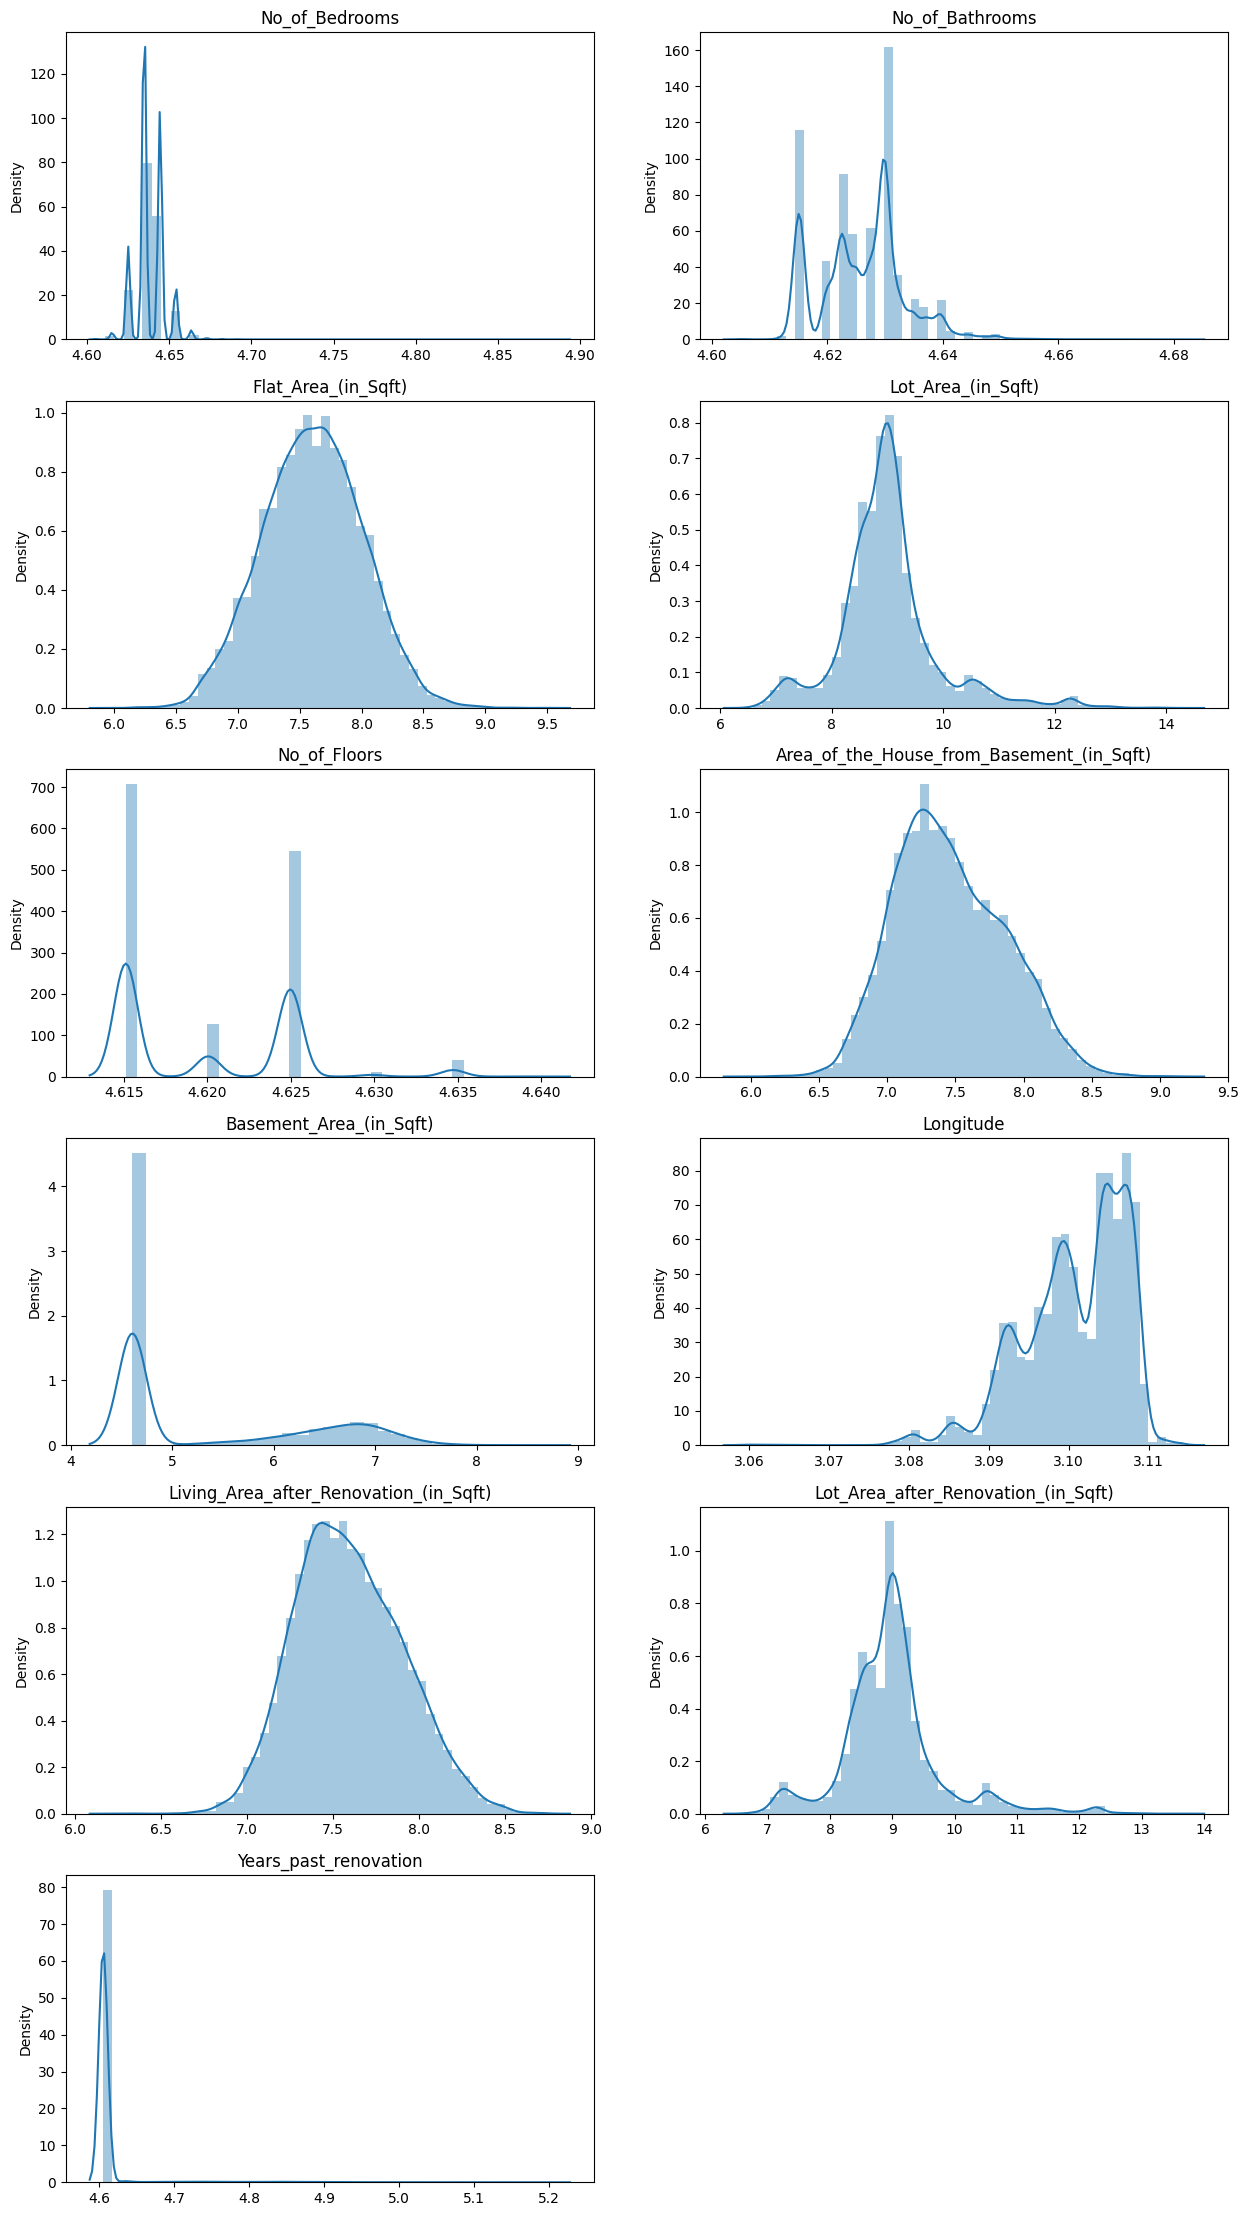

In [40]:
plt.figure(figsize=(15,20), dpi =100)

j=1
for col in Col_right_skew:
    plt.subplot(6,2,j)
    Group_plot_num(col, data)
    j= j+1

plt.subplots_adjust(top= 1.2)

Year past Renovation still has right Skewness. We will leave it as it is. 

<h1>Splitting Data</h1>

In [41]:
from sklearn.model_selection import train_test_split
X = data.iloc[:,1:]
Y = data.iloc[:,0]

X

,No_of_Bedrooms,No_of_Bathrooms,Flat_Area_(in_Sqft),Lot_Area_(in_Sqft),No_of_Floors,Waterfront_View,No_of_Times_Visited,Condition_of_the_House,Overall_Grade,Area_of_the_House_from_Basement_(in_Sqft),Basement_Area_(in_Sqft),Age_of_House_(in_Years),Zipcode,Latitude,Longitude,Living_Area_after_Renovation_(in_Sqft),Lot_Area_after_Renovation_(in_Sqft),ever_renovated,Years_past_renovation
0,4.634729,4.615121,7.154615,8.656955,4.615121,No,None,Good,7,7.154615,4.605170,63,98178.0,47.5112,3.102657,7.272398,8.656955,No,4.605170
1,4.634729,4.627421,7.889834,8.901367,4.624973,No,None,Good,7,7.727535,6.214608,67,98125.0,47.7210,3.105438,7.489971,8.954028,Yes,4.836282
2,4.624973,4.615121,6.768493,9.220291,4.615121,No,None,Good,6,6.768493,4.605170,85,98028.0,47.7379,3.101578,7.944492,9.007245,No,4.605170
3,4.644391,4.634729,7.630461,8.536996,4.615121,No,None,Excellent,7,7.047517,6.917706,53,98136.0,47.5208,3.108748,7.286192,8.536996,No,4.605170
4,4.634729,4.624973,7.484369,9.009447,4.615121,No,None,Good,8,7.484369,4.605170,31,98074.0,47.6168,3.093086,7.549609,8.936298,No,4.605170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,4.634729,4.629863,7.396335,7.115582,4.634729,No,None,Good,8,7.396335,4.605170,9,98103.0,47.6993,3.106647,7.396335,7.383368,No,4.605170
21609,4.644391,4.629863,7.787382,8.684909,4.624973,No,None,Good,8,7.787382,4.605170,4,98146.0,47.5107,3.107363,7.565275,8.895630,No,4.605170
21610,4.624973,4.612642,7.021084,7.279319,4.624973,No,None,Good,7,7.021084,4.605170,9,98144.0,47.5944,3.104542,7.021084,7.653020,No,4.605170
21611,4.634729,4.629863,7.438384,7.819234,4.624973,No,None,Good,8,7.438384,4.605170,14,98027.0,47.5345,3.094174,7.319865,7.234898,No,4.605170


<h1>Encoding </h1>

In [42]:
dict = {'No': 0, 'Yes':1}

X['Waterfront_View'] = X['Waterfront_View'].map(dict)
X['ever_renovated'] = X['ever_renovated'].map(dict)

In [43]:
X

,No_of_Bedrooms,No_of_Bathrooms,Flat_Area_(in_Sqft),Lot_Area_(in_Sqft),No_of_Floors,Waterfront_View,No_of_Times_Visited,Condition_of_the_House,Overall_Grade,Area_of_the_House_from_Basement_(in_Sqft),Basement_Area_(in_Sqft),Age_of_House_(in_Years),Zipcode,Latitude,Longitude,Living_Area_after_Renovation_(in_Sqft),Lot_Area_after_Renovation_(in_Sqft),ever_renovated,Years_past_renovation
0,4.634729,4.615121,7.154615,8.656955,4.615121,0,None,Good,7,7.154615,4.605170,63,98178.0,47.5112,3.102657,7.272398,8.656955,0,4.605170
1,4.634729,4.627421,7.889834,8.901367,4.624973,0,None,Good,7,7.727535,6.214608,67,98125.0,47.7210,3.105438,7.489971,8.954028,1,4.836282
2,4.624973,4.615121,6.768493,9.220291,4.615121,0,None,Good,6,6.768493,4.605170,85,98028.0,47.7379,3.101578,7.944492,9.007245,0,4.605170
3,4.644391,4.634729,7.630461,8.536996,4.615121,0,None,Excellent,7,7.047517,6.917706,53,98136.0,47.5208,3.108748,7.286192,8.536996,0,4.605170
4,4.634729,4.624973,7.484369,9.009447,4.615121,0,None,Good,8,7.484369,4.605170,31,98074.0,47.6168,3.093086,7.549609,8.936298,0,4.605170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,4.634729,4.629863,7.396335,7.115582,4.634729,0,None,Good,8,7.396335,4.605170,9,98103.0,47.6993,3.106647,7.396335,7.383368,0,4.605170
21609,4.644391,4.629863,7.787382,8.684909,4.624973,0,None,Good,8,7.787382,4.605170,4,98146.0,47.5107,3.107363,7.565275,8.895630,0,4.605170
21610,4.624973,4.612642,7.021084,7.279319,4.624973,0,None,Good,7,7.021084,4.605170,9,98144.0,47.5944,3.104542,7.021084,7.653020,0,4.605170
21611,4.634729,4.629863,7.438384,7.819234,4.624973,0,None,Good,8,7.438384,4.605170,14,98027.0,47.5345,3.094174,7.319865,7.234898,0,4.605170


In [44]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
ct = ColumnTransformer(transformers=[('ord_encoder',OrdinalEncoder(), ['No_of_Times_Visited', 'Condition_of_the_House'])], remainder='passthrough')
X_temp = ct.fit_transform(X)

In [45]:
data.No_of_Times_Visited.value_counts()

None      19481
Twice       963
Thrice      510
Once        332
Four        319
Name: No_of_Times_Visited, dtype: int64

In [46]:
X= pd.DataFrame(X_temp, columns = X.columns)

In [47]:
X

,No_of_Bedrooms,No_of_Bathrooms,Flat_Area_(in_Sqft),Lot_Area_(in_Sqft),No_of_Floors,Waterfront_View,No_of_Times_Visited,Condition_of_the_House,Overall_Grade,Area_of_the_House_from_Basement_(in_Sqft),Basement_Area_(in_Sqft),Age_of_House_(in_Years),Zipcode,Latitude,Longitude,Living_Area_after_Renovation_(in_Sqft),Lot_Area_after_Renovation_(in_Sqft),ever_renovated,Years_past_renovation
0,1.0,2.0,4.634729,4.615121,7.154615,8.656955,4.615121,0.0,7.0,7.154615,4.605170,63.0,98178.0,47.5112,3.102657,7.272398,8.656955,0.0,4.605170
1,1.0,2.0,4.634729,4.627421,7.889834,8.901367,4.624973,0.0,7.0,7.727535,6.214608,67.0,98125.0,47.7210,3.105438,7.489971,8.954028,1.0,4.836282
2,1.0,2.0,4.624973,4.615121,6.768493,9.220291,4.615121,0.0,6.0,6.768493,4.605170,85.0,98028.0,47.7379,3.101578,7.944492,9.007245,0.0,4.605170
3,1.0,1.0,4.644391,4.634729,7.630461,8.536996,4.615121,0.0,7.0,7.047517,6.917706,53.0,98136.0,47.5208,3.108748,7.286192,8.536996,0.0,4.605170
4,1.0,2.0,4.634729,4.624973,7.484369,9.009447,4.615121,0.0,8.0,7.484369,4.605170,31.0,98074.0,47.6168,3.093086,7.549609,8.936298,0.0,4.605170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21600,1.0,2.0,4.634729,4.629863,7.396335,7.115582,4.634729,0.0,8.0,7.396335,4.605170,9.0,98103.0,47.6993,3.106647,7.396335,7.383368,0.0,4.605170
21601,1.0,2.0,4.644391,4.629863,7.787382,8.684909,4.624973,0.0,8.0,7.787382,4.605170,4.0,98146.0,47.5107,3.107363,7.565275,8.895630,0.0,4.605170
21602,1.0,2.0,4.624973,4.612642,7.021084,7.279319,4.624973,0.0,7.0,7.021084,4.605170,9.0,98144.0,47.5944,3.104542,7.021084,7.653020,0.0,4.605170
21603,1.0,2.0,4.634729,4.629863,7.438384,7.819234,4.624973,0.0,8.0,7.438384,4.605170,14.0,98027.0,47.5345,3.094174,7.319865,7.234898,0.0,4.605170


<h2>Scaling</h2>

In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_temp = sc.fit_transform(X)

In [49]:
X = pd.DataFrame(X_temp, columns = X.columns)
X

,No_of_Bedrooms,No_of_Bathrooms,Flat_Area_(in_Sqft),Lot_Area_(in_Sqft),No_of_Floors,Waterfront_View,No_of_Times_Visited,Condition_of_the_House,Overall_Grade,Area_of_the_House_from_Basement_(in_Sqft),Basement_Area_(in_Sqft),Age_of_House_(in_Years),Zipcode,Latitude,Longitude,Living_Area_after_Renovation_(in_Sqft),Lot_Area_after_Renovation_(in_Sqft),ever_renovated,Years_past_renovation
0,-0.258605,0.298361,-0.397981,-1.454370,-1.123664,-0.394406,-0.916457,-0.087189,-0.563972,-0.757441,-0.764040,0.545032,1.870041,-0.352442,0.308219,-1.033945,-0.400712,-0.210056,-0.173205
1,-0.258605,0.298361,-0.397981,0.179609,0.706286,-0.119474,0.938585,-0.087189,-0.563972,0.665967,0.794022,0.681241,0.879523,1.161732,0.745753,-0.334051,-0.029990,4.760646,5.024162
2,-0.258605,0.298361,-1.490528,-1.454370,-2.084717,0.239276,-0.916457,-0.087189,-1.468480,-1.716754,-0.764040,1.294180,-0.933313,1.283703,0.138524,1.128066,0.036420,-0.210056,-0.173205
3,-0.258605,-2.763917,0.684010,1.150435,0.060711,-0.529345,-0.916457,-0.087189,-0.563972,-1.023524,1.474675,0.204510,1.085102,-0.283157,1.266383,-0.989574,-0.550412,-0.210056,-0.173205
4,-0.258605,0.298361,-0.397981,-0.145583,-0.302912,0.002103,-0.916457,-0.087189,0.340535,0.061825,-0.764040,-0.544638,-0.073618,0.409697,-1.197129,-0.142205,-0.052115,-0.210056,-0.173205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21600,-0.258605,0.298361,-0.397981,0.504007,-0.522026,-2.128257,2.775528,-0.087189,0.340535,-0.156892,-0.764040,-1.293786,0.468364,1.005118,0.935912,-0.635261,-1.990045,-0.210056,-0.173205
21601,-0.258605,0.298361,0.684010,0.504007,0.451285,-0.362962,0.938585,-0.087189,0.340535,0.814656,-0.764040,-1.464047,1.271992,-0.356050,1.048491,-0.091810,-0.102866,-0.210056,-0.173205
21602,-0.258605,0.298361,-1.490528,-1.783591,-1.456022,-1.944074,0.938585,-0.087189,-0.563972,-1.089197,-0.764040,-1.293786,1.234614,0.248031,0.604746,-1.842380,-1.653541,-0.210056,-0.173205
21603,-0.258605,0.298361,-0.397981,0.504007,-0.417368,-1.336737,0.938585,-0.087189,0.340535,-0.052424,-0.764040,-1.123525,-0.952002,-0.184281,-1.025987,-0.881253,-2.175323,-0.210056,-0.173205


<h1>Bivariate Analysis</h1>

<h2>Correlation</h2>

<AxesSubplot:>

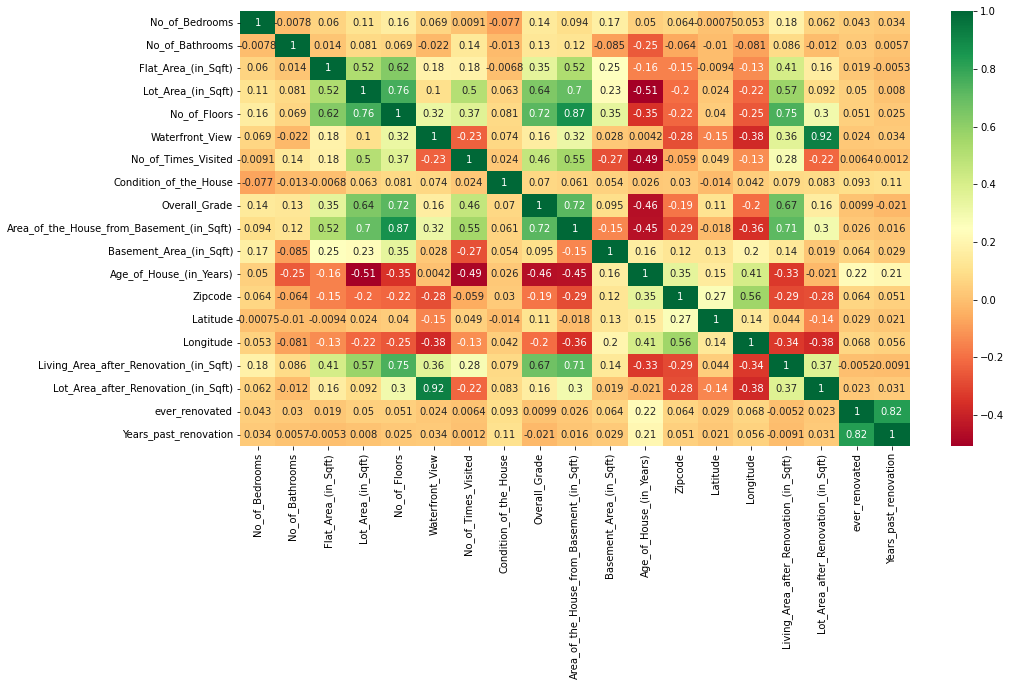

In [50]:
corr = X.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot = True, cmap ="RdYlGn")

In [51]:
Correlated_pairs = [(var1, var2) for var1 in corr.columns for var2 in corr.columns if (abs(corr.loc[var1, var2])> 0.5) & ((var1 != var2))]
Correlated_pairs, len(Correlated_pairs)

([('Flat_Area_(in_Sqft)', 'Lot_Area_(in_Sqft)'),
  ('Flat_Area_(in_Sqft)', 'No_of_Floors'),
  ('Flat_Area_(in_Sqft)', 'Area_of_the_House_from_Basement_(in_Sqft)'),
  ('Lot_Area_(in_Sqft)', 'Flat_Area_(in_Sqft)'),
  ('Lot_Area_(in_Sqft)', 'No_of_Floors'),
  ('Lot_Area_(in_Sqft)', 'No_of_Times_Visited'),
  ('Lot_Area_(in_Sqft)', 'Overall_Grade'),
  ('Lot_Area_(in_Sqft)', 'Area_of_the_House_from_Basement_(in_Sqft)'),
  ('Lot_Area_(in_Sqft)', 'Age_of_House_(in_Years)'),
  ('Lot_Area_(in_Sqft)', 'Living_Area_after_Renovation_(in_Sqft)'),
  ('No_of_Floors', 'Flat_Area_(in_Sqft)'),
  ('No_of_Floors', 'Lot_Area_(in_Sqft)'),
  ('No_of_Floors', 'Overall_Grade'),
  ('No_of_Floors', 'Area_of_the_House_from_Basement_(in_Sqft)'),
  ('No_of_Floors', 'Living_Area_after_Renovation_(in_Sqft)'),
  ('Waterfront_View', 'Lot_Area_after_Renovation_(in_Sqft)'),
  ('No_of_Times_Visited', 'Lot_Area_(in_Sqft)'),
  ('No_of_Times_Visited', 'Area_of_the_House_from_Basement_(in_Sqft)'),
  ('Overall_Grade', 'Lot_Area

<h2>VIF</h2>

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def Multi_col_remover(X):
        VIF = pd.DataFrame()
        VIF['feature'] = X.columns
    
        VIF['VIF_value'] = pd.Series([variance_inflation_factor(X.values, i) for i in range(len(X.columns))])
        
        if (VIF['VIF_value'].max()>5):
            print(str(VIF[VIF['VIF_value'] == VIF['VIF_value'].max()]['feature'].values[0]), '  is removed')
            X.drop(columns = str(VIF[VIF['VIF_value'] == VIF['VIF_value'].max()]['feature'].values[0]), inplace= True)
        else:
            print( 'No Multicollinearity found')
            
        return X

temp1 = X
for i in range(19):
    temp1= Multi_col_remover(temp1)
temp1

No_of_Floors   is removed
Waterfront_View   is removed
Area_of_the_House_from_Basement_(in_Sqft)   is removed
No Multicollinearity found
No Multicollinearity found
No Multicollinearity found
No Multicollinearity found
No Multicollinearity found
No Multicollinearity found
No Multicollinearity found
No Multicollinearity found
No Multicollinearity found
No Multicollinearity found
No Multicollinearity found
No Multicollinearity found
No Multicollinearity found
No Multicollinearity found
No Multicollinearity found
No Multicollinearity found


,No_of_Bedrooms,No_of_Bathrooms,Flat_Area_(in_Sqft),Lot_Area_(in_Sqft),No_of_Times_Visited,Condition_of_the_House,Overall_Grade,Basement_Area_(in_Sqft),Age_of_House_(in_Years),Zipcode,Latitude,Longitude,Living_Area_after_Renovation_(in_Sqft),Lot_Area_after_Renovation_(in_Sqft),ever_renovated,Years_past_renovation
0,-0.258605,0.298361,-0.397981,-1.454370,-0.916457,-0.087189,-0.563972,-0.764040,0.545032,1.870041,-0.352442,0.308219,-1.033945,-0.400712,-0.210056,-0.173205
1,-0.258605,0.298361,-0.397981,0.179609,0.938585,-0.087189,-0.563972,0.794022,0.681241,0.879523,1.161732,0.745753,-0.334051,-0.029990,4.760646,5.024162
2,-0.258605,0.298361,-1.490528,-1.454370,-0.916457,-0.087189,-1.468480,-0.764040,1.294180,-0.933313,1.283703,0.138524,1.128066,0.036420,-0.210056,-0.173205
3,-0.258605,-2.763917,0.684010,1.150435,-0.916457,-0.087189,-0.563972,1.474675,0.204510,1.085102,-0.283157,1.266383,-0.989574,-0.550412,-0.210056,-0.173205
4,-0.258605,0.298361,-0.397981,-0.145583,-0.916457,-0.087189,0.340535,-0.764040,-0.544638,-0.073618,0.409697,-1.197129,-0.142205,-0.052115,-0.210056,-0.173205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21600,-0.258605,0.298361,-0.397981,0.504007,2.775528,-0.087189,0.340535,-0.764040,-1.293786,0.468364,1.005118,0.935912,-0.635261,-1.990045,-0.210056,-0.173205
21601,-0.258605,0.298361,0.684010,0.504007,0.938585,-0.087189,0.340535,-0.764040,-1.464047,1.271992,-0.356050,1.048491,-0.091810,-0.102866,-0.210056,-0.173205
21602,-0.258605,0.298361,-1.490528,-1.783591,0.938585,-0.087189,-0.563972,-0.764040,-1.293786,1.234614,0.248031,0.604746,-1.842380,-1.653541,-0.210056,-0.173205
21603,-0.258605,0.298361,-0.397981,0.504007,0.938585,-0.087189,0.340535,-0.764040,-1.123525,-0.952002,-0.184281,-1.025987,-0.881253,-2.175323,-0.210056,-0.173205


<h1>Linear Regression</h1>

<h2>Train/Test Split</h2>

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17284, 16), (4321, 16), (17284,), (4321,))

In [54]:
from sklearn.linear_model import LinearRegression
lnreg = LinearRegression()

lnreg = lnreg.fit(X_train,y_train)

In [55]:
predict_values = lnreg.predict(X_test)

In [56]:
lnreg.score(X_test, y_test)

0.725335609591955

<h2>Residuals</h2>

In [57]:
residuals = predict_values-y_test.values
residuals

array([-214588.35696029,   86840.58445082,  118042.87240785, ...,
         60299.11101251, -139870.15330589,  158294.6388229 ])

<function matplotlib.pyplot.show(close=None, block=None)>

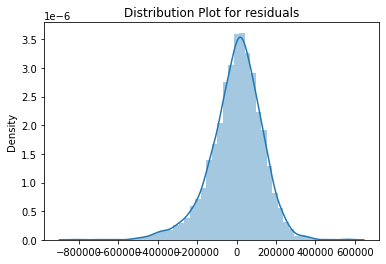

In [58]:
sns.distplot(a= residuals)
plt.title('Distribution Plot for residuals')
plt.show

# The residuals have a Normal distribution which was one of the assumptions of the Linear regression.

In [84]:
Coeff_table = pd.DataFrame({'Features': X_train.columns,
                                  'coefficients': lnreg.coef_})
Coeff_table = Coeff_table.sort_values(by = 'coefficients')

Coeff_table

,Features,coefficients
9,Zipcode,-15098.358573
15,Years_past_renovation,-11693.930949
1,No_of_Bathrooms,-9501.879985
2,Flat_Area_(in_Sqft),1021.847616
13,Lot_Area_after_Renovation_(in_Sqft),4010.276556
11,Longitude,7795.702302
7,Basement_Area_(in_Sqft),14344.721019
14,ever_renovated,15501.948232
0,No_of_Bedrooms,16170.905212
4,No_of_Times_Visited,21912.706312


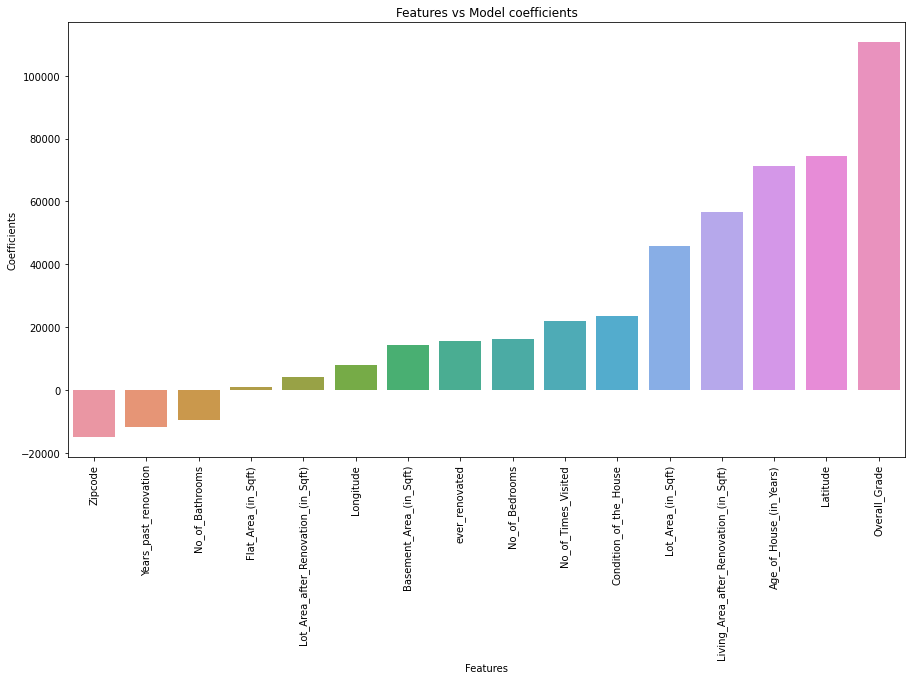

In [85]:
plt.figure(figsize=(15,8))
sns.barplot(x= Coeff_table['Features'], y = Coeff_table['coefficients'])
plt.xlabel('Features')
plt.xticks(fontsize=10,rotation = 90)
plt.ylabel('Coefficients')
plt.title('Features vs Model coefficients')
plt.show()

<h2>P value of the Model</h2>

In [86]:
stats.summary(lnreg, X_train, y_train, xlabels = X_train.columns)

Residuals:
          Min          1Q     Median         3Q        Max
-1.061164e+06 -71308.3828 10396.9527 86173.7543 624747.347


Coefficients:
                                             Estimate   Std. Error   t value   p value
_intercept                              511303.011217  1016.743385  502.8830  0.000000
No_of_Bedrooms                           16170.905212  1050.729558   15.3902  0.000000
No_of_Bathrooms                          -9501.879985  1050.784179   -9.0427  0.000000
Flat_Area_(in_Sqft)                       1021.847616  1187.412298    0.8606  0.389489
Lot_Area_(in_Sqft)                       45926.454013  1613.448203   28.4648  0.000000
No_of_Times_Visited                      21912.706312  1397.100049   15.6844  0.000000
Condition_of_the_House                   23460.295886  1034.054233   22.6877  0.000000
Overall_Grade                           110705.906302  1509.166488   73.3557  0.000000
Basement_Area_(in_Sqft)                  14344.721019  1198.982449   11.

From Model Coefficient graph and Model summary p_value it is clear that Flat Area is not statistically significant in deciding the Sales Price.
Hence, we can build the model without this Variable. 